<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Kaggle Competition</h3></center> 
<center><h3> </h3></center> 
<center><h3> Prediction Program</h3></center> 



# Read train data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale

In [35]:
train_data = pd.read_pickle("train_cleaned.pkl")
test_data = pd.read_pickle("test_cleaned.pkl")

In [36]:
train_data.drop(columns=['Id', 'Profile Image', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color'], inplace=True)
test_data.drop(columns=['Id', 'Profile Image', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color'], inplace=True)

In [37]:
#Temp drop
#train_data.drop(columns=["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages"], inplace=True)
#train_data = train_data[["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages", "Num of Profile Likes"]]
#train_data = train_data[["Is Profile View Size Customized?", "Avg Daily Profile Visit Duration in seconds", "Profile Creation WeekDay", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Num of Status Updates", "Num of Profile Likes"]]

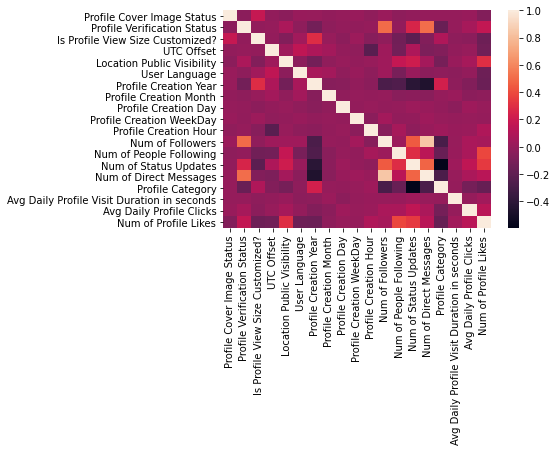

In [38]:
corr =train_data.corr()
sns.heatmap(corr)

In [39]:
cor_data = train_data
cor_data

,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Year,Profile Creation Month,Profile Creation Day,Profile Creation WeekDay,Profile Creation Hour,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes
0,1.0,2,0,39600.0,2.0,6,2008,11,27,3.0,5,4.981202,3.632457,4.488692,2.941511,0,1.204120,0.477121,3.449633
1,1.0,2,0,-14400.0,2.0,6,2010,1,15,4.0,18,6.008066,2.462398,3.911211,2.463893,3,0.954243,1.079181,3.094471
2,1.0,0,0,-18000.0,2.0,6,2009,10,2,4.0,20,4.128561,3.273464,3.672005,2.357935,3,1.518514,0.301030,3.193125
3,0.0,2,0,-14400.0,2.0,6,2009,2,19,3.0,14,5.530416,3.060320,4.726050,3.605951,0,1.380211,0.698970,3.802295
4,1.0,0,0,-18000.0,2.0,6,2009,3,31,1.0,13,3.964542,1.973128,3.514813,2.117271,3,0.954243,0.698970,3.033021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,2,0,-25200.0,1.0,6,2011,1,20,3.0,20,3.784403,1.886491,2.993877,1.755875,3,1.414973,0.954243,3.137987
7496,0.0,0,0,-10800.0,2.0,18,2011,3,16,3.0,3,5.447454,4.586644,4.314983,2.238046,3,1.431364,0.301030,3.148603
7497,1.0,2,0,7200.0,2.0,6,2009,3,14,5.0,16,4.335418,1.698970,3.370883,2.434569,3,1.204120,0.602060,3.092018
7498,1.0,0,0,-10800.0,2.0,18,2009,7,25,5.0,16,4.949419,2.409933,4.868239,2.540329,0,1.113943,0.477121,3.043755


In [40]:
train = cor_data.to_numpy()
Y_likes = train[:, -1] # for last column
X_likes = train[:, :-1] # for all but last column

X_Kaggle = test_data.to_numpy()

X_likes_scaled = minmax_scale(X_likes)

In [41]:
columnsNamesArr = cor_data.columns.values
labels = columnsNamesArr[:-1]

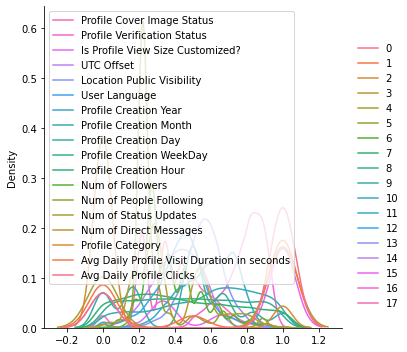

In [42]:
sns.displot(data=X_likes_scaled, kind='kde', legend=True);
plt.legend(labels)


**Scaling and selecting features**

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_selected_feat_likes = SelectKBest(f_regression, k=17).fit_transform(X_likes_scaled, Y_likes)
X_selected_feat_likes.shape

(6677, 17)

**Sklearn Pipeline**

In [44]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42 #  To guarantee that the split will always be the same
                                                    )  


**Classifier**

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

**Metric**

In [46]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.8554123067980958


In [47]:
bias = regressor.intercept_
weights = regressor.coef_ 

print(f"Weights -> {weights}")
print(f"Bias -> {bias}")

Weights -> [-0.09191985  0.37020357 -0.18667555 -0.54212288  0.40278132 -0.64510697
  0.31970771  0.07705357  0.02124819  0.17549149 -0.54890829  1.87801301
  2.5679635  -0.41041766  0.10007058  0.2257416   0.36807874]
Bias -> 0.28509873556282983


**Predict Kaggle Data**

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_likes, Y_likes)
y_pred = regressor.predict(X_Kaggle)

In [49]:
preds = 10 ** y_pred - 1
preds = np.around(preds)
np.savetxt("preds.csv", preds, delimiter=",")